# Linear regressin for Boston Dataset
Linear regreesion model is used to find a relationshop between independent variables and a dependent variable (features<->target)

The Boston Housing Dataset is derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. 


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

## 1. Data Acquisition & Preparation

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
#Description of the dataset
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
df_boston=pd.DataFrame(boston["data"], columns= boston["feature_names"])

#add the result(housing price) to the dataframe
df_boston["price"]=boston["target"]

In [5]:
#Exploratory Data Analysis

#check null values
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

<AxesSubplot:>

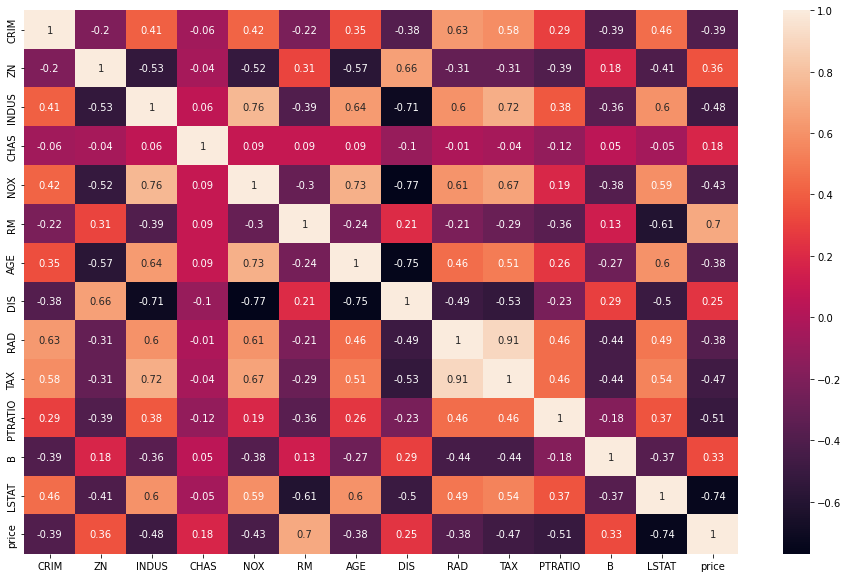

In [6]:
#correlation among data columns
corr = df_boston.corr().round(2)
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True)

With this heatmap, we can see two things:
1. RM has high positive correlation of 0.7 to the target (housing price) and LSTAT has high negative correlation of -0.74 to the target.
2. Some columns/features have strong correlations with each other, i.e. RAD and TAX's correlation is 0.91 (Multicollinearity)


## 2. Model Selection
Because of the high correlation between the features of RM and Price, it is useful to use linear regression model to predict the value of the target variable, Price, based on the independent variable, RM.

## 3. Model Building and Training

In [8]:
# X= RM       average number of rooms per dwelling
X= df_boston["RM"]
X=X.values.reshape(-1,1)

# y = price
y= df_boston["price"].values

In [9]:
# split train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## 4. Model Prediction

In [11]:
#predicted results
lr_predict =lr.predict(X_test)
lr_predict

array([18.99843004, 27.4081814 , 18.40205507, 25.15232826, 20.9863466 ,
       18.71320723, 20.54554771, 22.45567623, 22.2741708 , 25.41162172,
       25.03132464, 23.78671601, 21.59136468, 20.40725786, 28.43671214,
       21.72965453, 29.85418308, 26.94145316, 14.27064588, 34.5041792 ,
       20.85669987, 24.05465259, 25.16961449, 23.1644117 , 15.68811681,
       28.77379364, 23.87314717, 22.09266538, 28.98987153, 16.23263309,
       19.31822531, 20.16525063, 19.86274159, 24.24480113, 22.98290627,
       19.8713847 , 23.5014932 , 36.30194722, 19.94052963, 23.70028486,
       30.26905262, 33.42378977, 29.13680449, 17.92668372, 23.8904334 ,
       16.76850625, 18.86878331, 14.03728176, 36.01672441, 22.48160558,
       29.45659976, 21.08142087, 22.08402226, 20.17389374, 17.96125618,
       20.88262921, 23.57063813, 40.48521511, 16.58700082, 21.95437553,
       21.80744257, 23.10390989, 19.62937747, 22.03216357, 28.50585706,
       15.01395381, 23.8904334 , 43.65723849, 24.21022867, 22.44

In [12]:
#actual results
y_test

array([19.5,  8.4, 19.8, 32.5, 20. , 10.5, 16.6, 12.6, 20.1, 22.4, 27.1,
       18.6, 17.8, 17.5, 41.3, 19.9, 30.3, 26.6, 10.4, 46. , 24.3, 14.3,
       24.8, 22.6, 15.6, 33.1, 25. , 23.2, 23.6,  8.5, 23.3, 21.4, 21.5,
       19.2, 23. , 19. , 23. , 48.5, 21.7, 21.7, 37.9, 43.1, 34.9, 18.2,
       13. , 17.6, 19.5,  7.2, 45.4, 18.5, 25. , 18.7, 11.7,  5.6, 19.3,
       21.2, 13.1, 41.7, 23.1, 13.8, 21.2, 19.6, 15.6, 10.9, 37. , 11.5,
       22.6, 50. , 17.1, 27. , 22.2, 34.6, 13.9,  8.3, 13.8, 23.2, 15.2,
       19.1, 27.1,  8.8, 13.5, 19.4, 30.1, 32.7, 20. , 24.3, 18.8, 22.9,
       14.9, 20.1, 35.2, 17.8, 29.1, 28.7, 31.1, 23.9, 17.1, 20.8, 13.2,
       19.4, 18.1,  7. ])

## 5. Model Evaluation

In [15]:
#loss functions
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [20]:
#coefficient of determination
r2_score(y_test, lr_predict)

0.5935870089912509

In [21]:
#mean absolute error
mean_absolute_error(y_test, lr_predict)

4.438099872156019

In [22]:
#mean squared error
mean_squared_error(y_test, lr_predict)

35.09180900684071

In [23]:
#root mean squared error
np.sqrt(mean_squared_error(y_test, lr_predict))

5.9238339786696175

### Description of the linear regression model I have created:

In [24]:
# y=mx+c
# m, Estimated coefficients
lr.coef_

array([8.64311547])

In [26]:
# c, intercept
lr.intercept_

-31.572438598887462

In [27]:
#y=mx+c

#price = -0.97 (RM) + 34.6

c:\users\liwin\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Predicted Results'), Text(0, 0.5, 'Actual Results')]

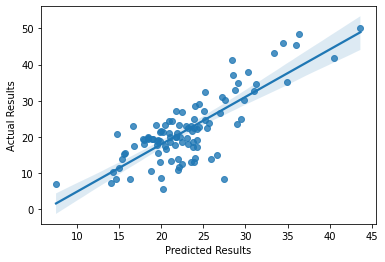

In [32]:
sns.regplot(lr_predict, y_test).set(xlabel='Predicted Results', ylabel='Actual Results')